# 🚗 Project: Crash Reporting - Predictive Analysis
---
## 1️⃣ Introduction
In this project, we perform predictive analysis on a **Crash Reporting** dataset. 
The objective is to predict whether a driver is **"At Fault"** based on various accident conditions such as weather, light, and collision type.

We will explore:
- **Exploratory Data Analysis (EDA)** to understand feature distributions.
- **Supervised Learning Models**: Logistic Regression, KNN, and Decision Trees.
- **Unsupervised Learning**: K-Means Clustering.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# These specific imports fix your NameError
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, StandardScaler

## 2️⃣ Data Loading & Preprocessing
We load the dataset, filter for the target variable, and encode categorical features.

In [ ]:
df = pd.read_csv(r"D:\5th Sem\INT234\Project\Crash_Reporting_-_Drivers_Data.csv")
print(df.info())
print(df.head())

C:\Users\kumar\AppData\Local\Temp\ipykernel_17380\629752811.py:1: DtypeWarning: Columns (1,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\5th Sem\INT234\Project\Crash_Reporting_-_Drivers_Data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207084 entries, 0 to 207083
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  207084 non-null  object 
 1   Local Case Number              207084 non-null  object 
 2   Agency Name                    207084 non-null  object 
 3   ACRS Report Type               207084 non-null  object 
 4   Crash Date/Time                207084 non-null  object 
 5   Route Type                     186836 non-null  object 
 6   Road Name                      183493 non-null  object 
 7   Cross-Street Name              168967 non-null  object 
 8   Off-Road Description           19208 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           6768 non-null    object 
 11  Collision Type                 206499 non-null  object 
 12  Weather                       

In [68]:
print(df.isna().sum())

Report Number                         0
Local Case Number                     0
Agency Name                           0
ACRS Report Type                      0
Crash Date/Time                       0
Route Type                        20248
Road Name                         23591
Cross-Street Name                 38117
Off-Road Description             187876
Municipality                     187958
Related Non-Motorist             200316
Collision Type                      585
Weather                           13356
Surface Condition                 23556
Light                              1445
Traffic Control                   28699
Driver Substance Abuse            31320
Non-Motorist Substance Abuse     201462
Person ID                             0
Driver At Fault                       0
Injury Severity                    2350
Circumstance                     167006
Driver Distracted By               2534
Drivers License State             13918
Vehicle ID                            0


In [69]:
# Filter Target: We want to predict if the driver is at fault ('Yes' vs 'No')
df = df[df['Driver At Fault'].isin(['Yes', 'No'])]

# Map Target to Binary (1 = Fault, 0 = No Fault)
df['Target'] = df['Driver At Fault'].map({'Yes': 1, 'No': 0})

In [ ]:
# Select Features for the Model
features = [
    'Weather', 
    'Surface Condition', 
    'Light', 
    'Collision Type', 
    'Vehicle Body Type', 
    'Speed Limit', 
    'Vehicle Movement'
]

# Creating a working dataframe
data = df[features + ['Target']].copy()

# Drop missing values
data = data.dropna()

In [71]:
# Encode Categorical Features using Label Encoding
for col in features:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])


## 3️⃣ Exploratory Data Analysis (EDA)
Visualizing correlations and feature distributions to understand the data better.

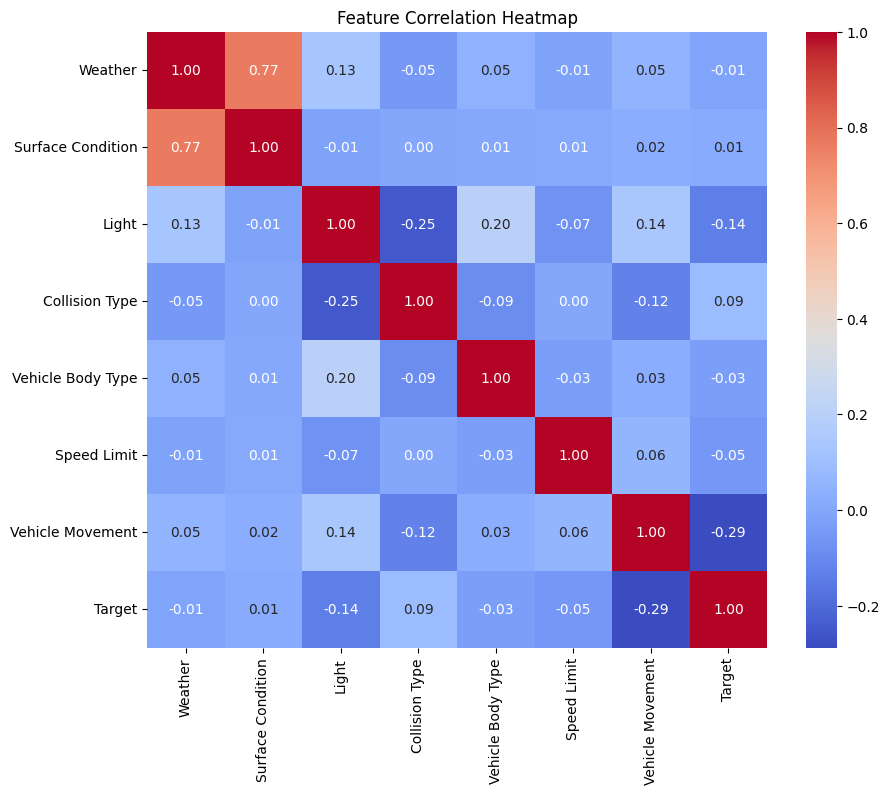

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

### 4️⃣ Feature Distributions (Histograms)
Visualizing the distribution of each feature to understand their spread and frequency.

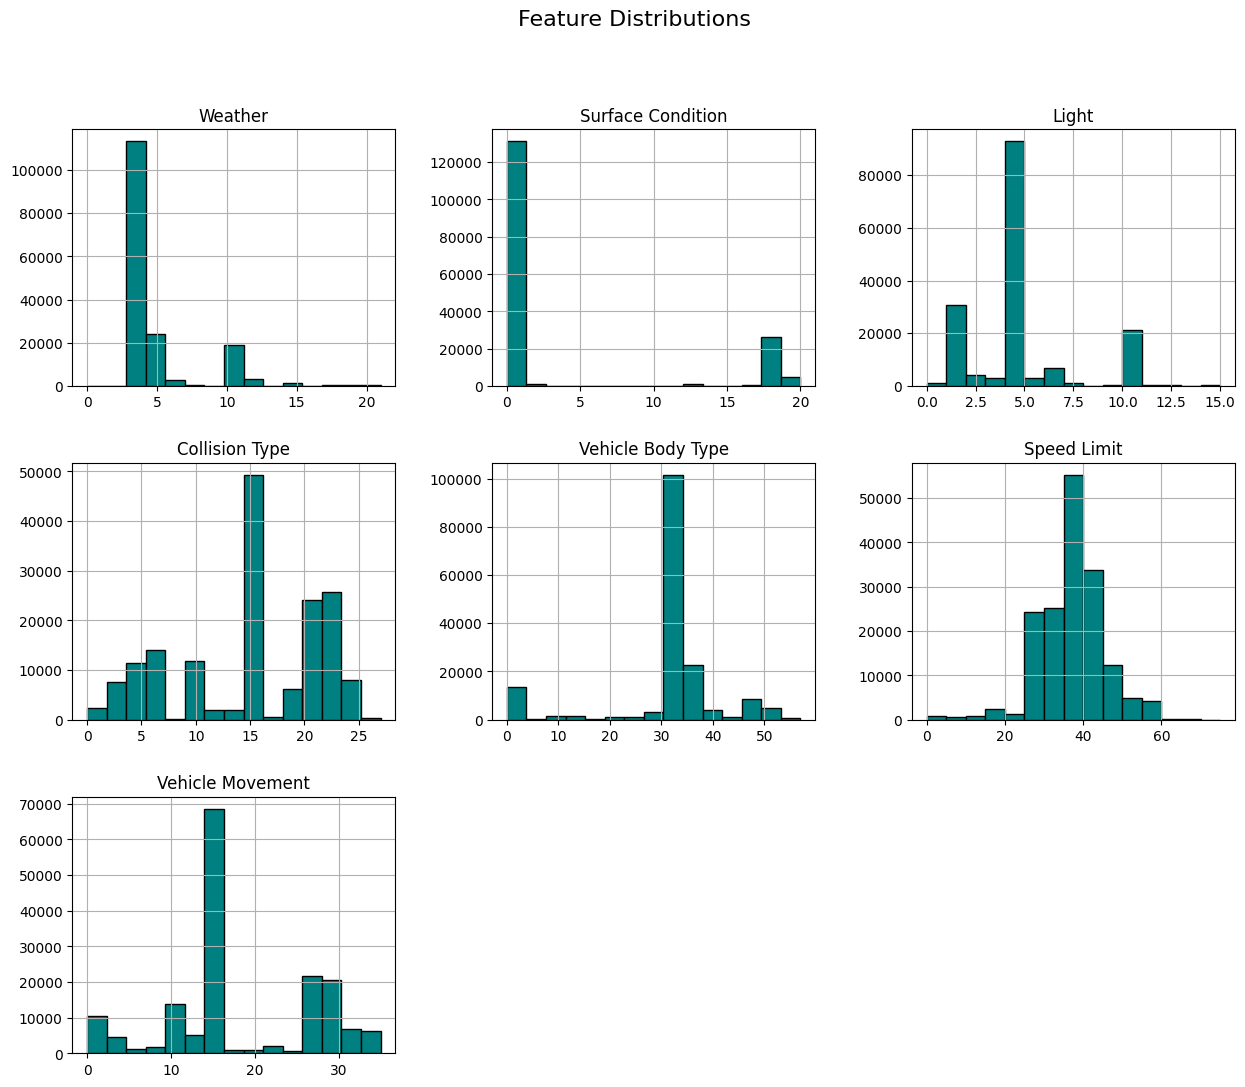

In [73]:

data[features].hist(figsize=(15, 12), bins=15, color='teal', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

## 5️⃣ Data Splitting & Scaling
Splitting the data into Training (70%) and Testing (30%) sets, and scaling features for distance-based algorithms.

In [74]:

X = data[features]
y = data['Target']

# Scale features (Critical for KNN, and good for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train (70%) and Test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


## 6️⃣ Model Building & Evaluation

### 🔹 Model 1: Logistic Regression
A linear model used for binary classification.


In [75]:

print("\n--- Logistic Regression Results ---")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Print Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))



--- Logistic Regression Results ---
Accuracy: 0.639204774578595

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62     25202
           1       0.62      0.71      0.66     24394

    accuracy                           0.64     49596
   macro avg       0.64      0.64      0.64     49596
weighted avg       0.64      0.64      0.64     49596



### 🔹 Confusion Matrix Plot (Logistic Regression)


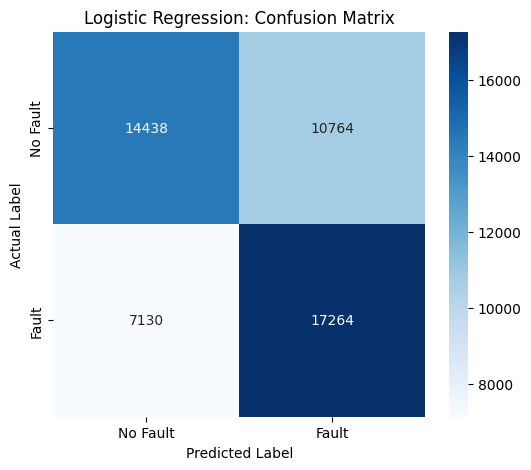

In [76]:

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Fault', 'Fault'], 
            yticklabels=['No Fault', 'Fault'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression: Confusion Matrix')
plt.show()

### 🔹 Metrics Comparison Plot (Logistic Regression)


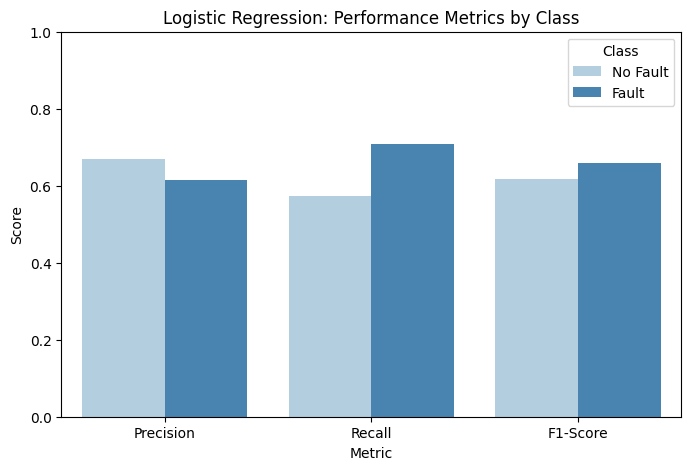

In [ ]:
precision_lr, recall_lr, fscore_lr, _ = precision_recall_fscore_support(y_test, y_pred_lr)
metrics_df_lr = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Precision', 'Recall', 'F1-Score'],
    'Score': [precision_lr[0], recall_lr[0], fscore_lr[0], precision_lr[1], recall_lr[1], fscore_lr[1]],
    'Class': ['No Fault', 'No Fault', 'No Fault', 'Fault', 'Fault', 'Fault']
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', hue='Class', data=metrics_df_lr, palette='Blues')
plt.title('Logistic Regression: Performance Metrics by Class')
plt.ylim(0, 1)
plt.show()

### 🔹 Model 2: K-Nearest Neighbors (KNN)
A distance-based algorithm that classifies based on the majority class of neighbors.

In [78]:

print("\n--- K-Nearest Neighbors (KNN) ---")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Print Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))



--- K-Nearest Neighbors (KNN) ---
Accuracy: 0.7119122509879829

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72     25202
           1       0.72      0.68      0.70     24394

    accuracy                           0.71     49596
   macro avg       0.71      0.71      0.71     49596
weighted avg       0.71      0.71      0.71     49596



### 🔹 Confusion Matrix Plot (KNN)


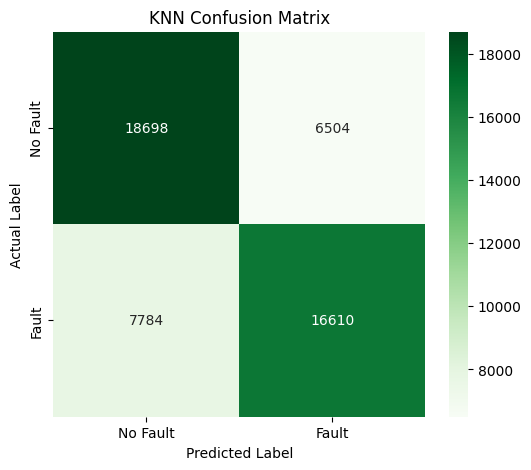

In [79]:

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Fault', 'Fault'], 
            yticklabels=['No Fault', 'Fault'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN Confusion Matrix')
plt.show()

### 🔹 Unsupervised Learning: K-Means Clustering
Clustering data into groups to see if natural patterns align with the 'At Fault' labels.

In [80]:
# Using 2 clusters to see if it aligns with the binary target
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

### 🔹 Cluster vs Actual Heatmap
Compare clusters to the actual labels from the full dataset

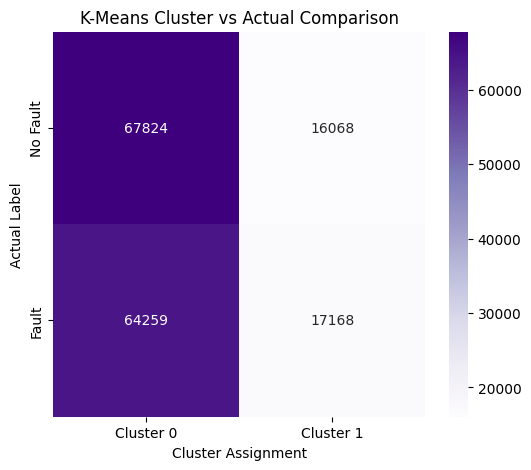

In [81]:

cluster_cm = confusion_matrix(y, cluster_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cluster_cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Cluster 0', 'Cluster 1'], 
            yticklabels=['No Fault', 'Fault'])
plt.xlabel('Cluster Assignment')
plt.ylabel('Actual Label')
plt.title('K-Means Cluster vs Actual Comparison')
plt.show()

### 🔹 Divide & Conquer: Decision Tree
A tree-based model that splits data based on feature values to make predictions.

In [82]:

print("\n--- Decision Tree (Divide & Conquer) ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions & Text Output Only
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


--- Decision Tree (Divide & Conquer) ---
Decision Tree Accuracy: 0.7303411565448826

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75     25202
           1       0.75      0.67      0.71     24394

    accuracy                           0.73     49596
   macro avg       0.73      0.73      0.73     49596
weighted avg       0.73      0.73      0.73     49596



### 🔹 Classification Report
### 🔹 Confusion Matrix


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     25202
           1       0.75      0.67      0.71     24394

    accuracy                           0.73     49596
   macro avg       0.73      0.73      0.73     49596
weighted avg       0.73      0.73      0.73     49596



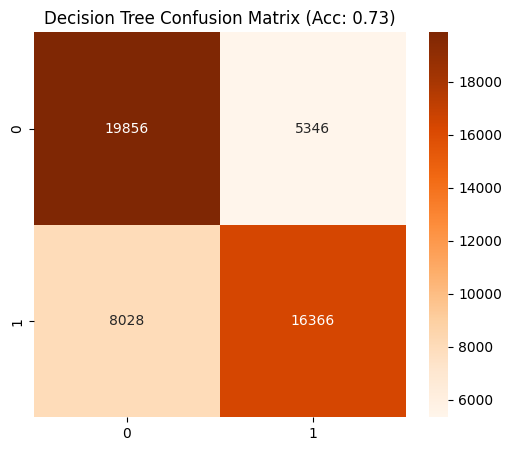

In [ ]:
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title(f'Decision Tree Confusion Matrix (Acc: {accuracy_score(y_test, y_pred_dt):.2f})')
plt.show()

## 7️⃣ Project Report Summary
Summary of model performance and data characteristics.

In [84]:
print("\n=== PROJECT REPORT SUMMARY ===")
print(f"1. Data processed with {len(data)} records.")
print(f"2. Features used: {features}")
print("-" * 30)
print(f"3. Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.2%}")
print(f"4. KNN Accuracy:                 {accuracy_score(y_test, y_pred_knn):.2%}")
print(f"5. Decision Tree Accuracy:       {accuracy_score(y_test, y_pred_dt):.2%}")
print("-" * 30)


=== PROJECT REPORT SUMMARY ===
1. Data processed with 165319 records.
2. Features used: ['Weather', 'Surface Condition', 'Light', 'Collision Type', 'Vehicle Body Type', 'Speed Limit', 'Vehicle Movement']
------------------------------
3. Logistic Regression Accuracy: 63.92%
4. KNN Accuracy:                 71.19%
5. Decision Tree Accuracy:       73.03%
------------------------------
